<a href="https://colab.research.google.com/github/kedarkotwal1/FraudJobDetection/blob/main/FraudJobDetection_IndiaJobs_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import pandas as pd
import nltk
import numpy as np
import re
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd drive/MyDrive/MSC_Project 

/content/drive/MyDrive/MSC_Project


In [5]:
scjobdf = pd.read_csv('FinalDataset.csv')

#Understanding the dataset

In [162]:
scjobdf.head()

,Unnamed: 0,title,location,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_education,required_experience,industry,function,fraudulent
0,0,QA Engineer,Bengaluru / Bangalore,NaN,Quess IT Staffing. Founded in 1997 as an entre...,End to End Functional testing of virtual educa...,Api Testing,NaN,0,1,1,Full time,Masters,Mid-Senior level,"IT/Computers - Hardware & Networking , IT/Comp...",IT,0
1,1,PMO,Bengaluru / Bangalore,NaN,Templeton and Partners,Understand the Project Delivery Framework (PDF...,Project Finance,NaN,0,0,1,Part time,Masters,Mid-Senior level,IT / Computers - Software,NaN,0
2,2,Chat Support,Chandigarh,240000-280000,Tech Mahindra is part of the US $15.4 billion ...,Process:- English process (Chat Process)\nNote...,Eligibility Criteria:-\nMandatory: Excellent c...,NaN,0,1,1,Full time,Bachelors,Associate,ITES/BPO,Customer Service/Call Centre/BPO,0
3,3,Angular Engineer,Remote,NaN,theuniversal.in,Responsibilities :1. Work closely with the tea...,Technical skills required :1. Angular 10 and a...,NaN,1,0,0,Full time,Bachelors,Associate,IT/Computers - Software,IT,1
4,4,Work From Home -Technical Support- Work From H...,Remote,220000-409999,NaN,Job Description:Voice support to the customer....,NaN,NaN,1,0,0,Part time,Bachelors,Associate,Telecom,Customer Service/Call Centre/BPO,1


In [7]:
print(scjobdf.info())
print(scjobdf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           220 non-null    int64 
 1   title                220 non-null    object
 2   location             220 non-null    object
 3   salary_range         88 non-null     object
 4   company_profile      166 non-null    object
 5   description          214 non-null    object
 6   requirements         183 non-null    object
 7   benefits             84 non-null     object
 8   telecommuting        220 non-null    int64 
 9   has_company_logo     220 non-null    int64 
 10  has_questions        220 non-null    int64 
 11  employment_type      201 non-null    object
 12  required_education   142 non-null    object
 13  required_experience  165 non-null    object
 14  industry             177 non-null    object
 15  function             182 non-null    object
 16  fraudule

In [8]:
jobdf = scjobdf.copy()
print(jobdf.head(2))

   Unnamed: 0        title               location salary_range  \
0           0  QA Engineer  Bengaluru / Bangalore          NaN   
1           1          PMO  Bengaluru / Bangalore          NaN   

                                     company_profile  \
0  Quess IT Staffing. Founded in 1997 as an entre...   
1                             Templeton and Partners   

                                         description     requirements  \
0  End to End Functional testing of virtual educa...     Api Testing    
1  Understand the Project Delivery Framework (PDF...  Project Finance   

  benefits  telecommuting  has_company_logo  has_questions employment_type  \
0      NaN              0                 1              1       Full time   
1      NaN              0                 0              1       Part time   

  required_education required_experience  \
0            Masters    Mid-Senior level   
1            Masters    Mid-Senior level   

                                            

dropping unnamed column

In [10]:
jobdf.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

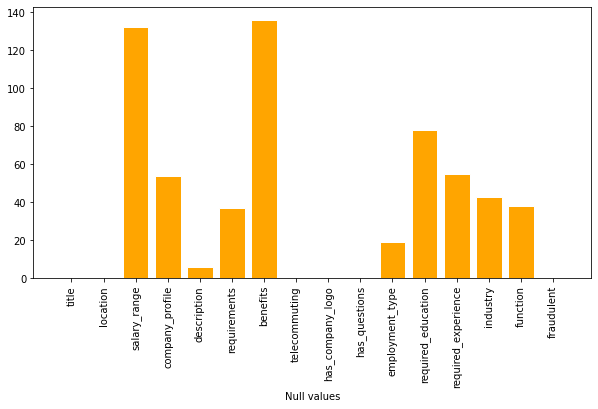

In [11]:
nullval = jobdf.isnull().sum()
plt.figure(figsize=(10,5))
plt.bar(jobdf.columns,nullval,color = 'orange', edgecolor = 'white')
plt.xlabel('Null values')
plt.xticks(rotation='vertical')
plt.show()

In [12]:
jobdf['fraudulent'].value_counts()

0    175
1     45
Name: fraudulent, dtype: int64

#Feature Engineering and Data Cleaning

Finding word count of company_profile, job description, requirements, benefits.

In [157]:
function = lambda x:len(x.split(' '))

len_compprof = jobdf['company_profile'].astype(str).apply(function)
len_desc = jobdf['description'].astype(str).apply(function)
len_req = jobdf['requirements'].astype(str).apply(function)
len_benefits = jobdf['benefits'].astype(str).apply(function)

# print(len_compprof.head())
# print(len_desc.head())
# print(len_req.head())
# print(len_benefits.head())

jobdf['compprof_len'] = len_compprof
jobdf['desc_len'] = len_desc
jobdf['req_len'] = len_req
jobdf['benefits_len'] = len_benefits


Utilizing NA values in columns. 

Creating new columns like no_description,no_benefits,no_companyProfile, etc. and put 1 if true.

Replacing benefits NaN values by 'empty'

In [14]:
jobdf['company_profile'].fillna('Empty',inplace=True)
jobdf['requirements'].fillna('Empty',inplace=True)
jobdf['description'].fillna('Empty',inplace=True)
jobdf['benefits'].fillna('Empty',inplace=True)

In [156]:
jobdf.head()

,title,location,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_education,required_experience,industry,function,fraudulent,compprof_len,desc_len,req_len,benefits_len,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof,has_short_req,has_spec_attr
0,QA Engineer,Bengaluru / Bangalore,NaN,Quess IT Staffing. Founded in 1997 as an entre...,End to End Functional testing of virtual educa...,Api Testing,Empty,0,1,1,Full Time,Master's Degree,Mid-Senior level,"IT/Computers - Hardware & Networking , IT/Comp...",IT,0,158,79,2,1,0,0,0,1,1,0,1,0
1,PMO,Bengaluru / Bangalore,NaN,Templeton and Partners,Understand the Project Delivery Framework (PDF...,Project Finance,Empty,0,0,1,Part Time,Master's Degree,Mid-Senior level,IT / Computers - Software,Empty,0,3,177,2,1,0,0,0,1,0,1,1,0
2,Chat Support,Chandigarh,240000-280000,Tech Mahindra is part of the US $15.4 billion ...,Process:- English process (Chat Process)\nNote...,Eligibility Criteria:-\nMandatory: Excellent c...,Empty,0,1,1,Full Time,Bachelor's Degree,Associate,ITES/BPO,Customer Service/Call Centre/BPO,0,281,86,50,1,0,0,0,1,1,0,0,0
3,Angular Engineer,Remote,NaN,theuniversal.in,Responsibilities :1. Work closely with the tea...,Technical skills required :1. Angular 10 and a...,Empty,1,0,0,Full Time,Bachelor's Degree,Associate,IT/Computers - Software,IT,1,1,38,36,1,0,0,0,1,1,1,0,0
4,Work From Home -Technical Support- Work From H...,Remote,220000-409999,Empty,Job Description:Voice support to the customer....,Empty,Empty,1,0,0,Part Time,Bachelor's Degree,Associate,Telecom,Customer Service/Call Centre/BPO,1,1,58,1,1,1,0,1,1,1,1,1,0


In [144]:
print(jobdf[jobdf['fraudulent']==1].has_company_logo.value_counts())
no_logo_f, yes_logo_f = jobdf[jobdf['fraudulent']==1].has_company_logo.value_counts()
print("\n")
print(jobdf[jobdf['fraudulent']==0].has_company_logo.value_counts())
yes_logo_nf, no_logo_nf = jobdf[jobdf['fraudulent']==0].has_company_logo.value_counts()

0    42
1     3
Name: has_company_logo, dtype: int64


1    121
0     54
Name: has_company_logo, dtype: int64


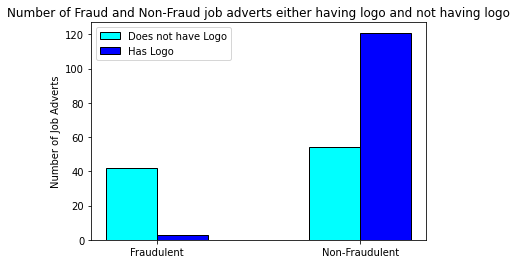

In [145]:
no_logo = [no_logo_f, no_logo_nf]
yes_logo = [yes_logo_f, yes_logo_nf]
  
n=2
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, no_logo, color = 'cyan',
        width = width, edgecolor = 'black',
        label='Does not have Logo')
plt.bar(r + width, yes_logo, color = 'blue',
        width = width, edgecolor = 'black',
        label='Has Logo')
  

plt.ylabel("Number of Job Adverts")
plt.title("Number of Fraud and Non-Fraud job adverts either having logo and not having logo")
  
plt.xticks(r + width/2,['Fraudulent', 'Non-Fraudulent'])
plt.legend()
  
plt.show()

In [148]:
print(jobdf[jobdf['fraudulent']==1].empty_req.value_counts())
yes_req_f, no_req_f = jobdf[jobdf['fraudulent']==1].empty_req.value_counts()
print("\n")
print(jobdf[jobdf['fraudulent']==0].empty_req.value_counts())
yes_req_nf, no_req_nf = jobdf[jobdf['fraudulent']==0].empty_req.value_counts()

0    28
1    17
Name: empty_req, dtype: int64


0    155
1     20
Name: empty_req, dtype: int64


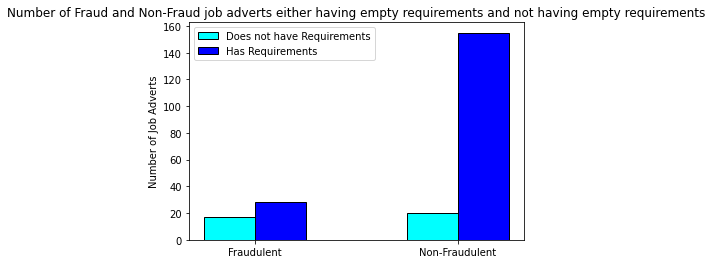

In [150]:
no_req = [no_req_f, no_req_nf]
yes_req = [yes_req_f, yes_req_nf]
  
n=2
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, no_req, color = 'cyan',
        width = width, edgecolor = 'black',
        label='Does not have Requirements')
plt.bar(r + width, yes_req, color = 'blue',
        width = width, edgecolor = 'black',
        label='Has Requirements')
  

plt.ylabel("Number of Job Adverts")
plt.title("Number of Fraud and Non-Fraud job adverts either having empty requirements and not having empty requirements")
  

plt.xticks(r + width/2,['Fraudulent', 'Non-Fraudulent'])
plt.legend()
  
plt.show()

In [152]:
print(jobdf[jobdf['fraudulent']==1].telecommuting.value_counts())
yes_tl_f, no_tl_f = jobdf[jobdf['fraudulent']==1].telecommuting.value_counts()
print("\n")
print(jobdf[jobdf['fraudulent']==0].telecommuting.value_counts())
no_tl_nf, yes_tl_nf = jobdf[jobdf['fraudulent']==0].telecommuting.value_counts()

1    33
0    12
Name: telecommuting, dtype: int64


0    157
1     18
Name: telecommuting, dtype: int64


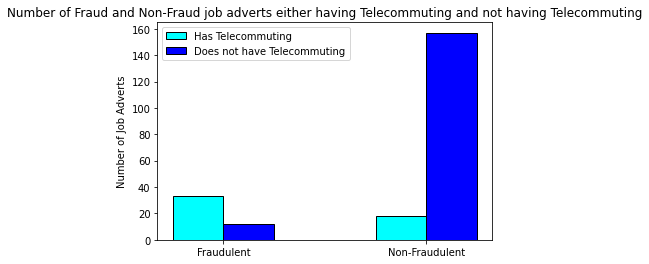

In [154]:
no_tl = [no_tl_f, no_tl_nf]
yes_tl = [yes_tl_f, yes_tl_nf]
  
n=2
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, yes_tl, color = 'cyan',
        width = width, edgecolor = 'black',
        label='Has Telecommuting')
plt.bar(r + width, no_tl, color = 'blue',
        width = width, edgecolor = 'black',
        label='Does not have Telecommuting')
  

plt.ylabel("Number of Job Adverts")
plt.title("Number of Fraud and Non-Fraud job adverts either having Telecommuting and not having Telecommuting")
  

plt.xticks(r + width/2,['Fraudulent', 'Non-Fraudulent'])
plt.legend()
  
plt.show()

Creating new column empty_benefits, empty_desc, empty_compprof having value as 1 or 0.

In [18]:
checkNA = lambda x: 1 if x=='Empty' else 0

empty_compprof = pd.DataFrame(jobdf['company_profile'].astype(str).apply(checkNA))
empty_desc = pd.DataFrame(jobdf['description'].astype(str).apply(checkNA))
empty_req = pd.DataFrame(jobdf['requirements'].astype(str).apply(checkNA))
empty_benefits = pd.DataFrame(jobdf['benefits'].astype(str).apply(checkNA))


In [19]:
jobdf['empty_compprof'] = empty_compprof
jobdf['empty_desc'] = empty_desc
jobdf['empty_req'] = empty_req
jobdf['empty_benefits'] = empty_benefits



In [ ]:
jobdf.head()

In [21]:
desc_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].desc_len)
desc_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].desc_len)

print(type(desc_nonfraud))

desc_fraud.reset_index(drop=True,inplace=True)
desc_nonfraud.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>


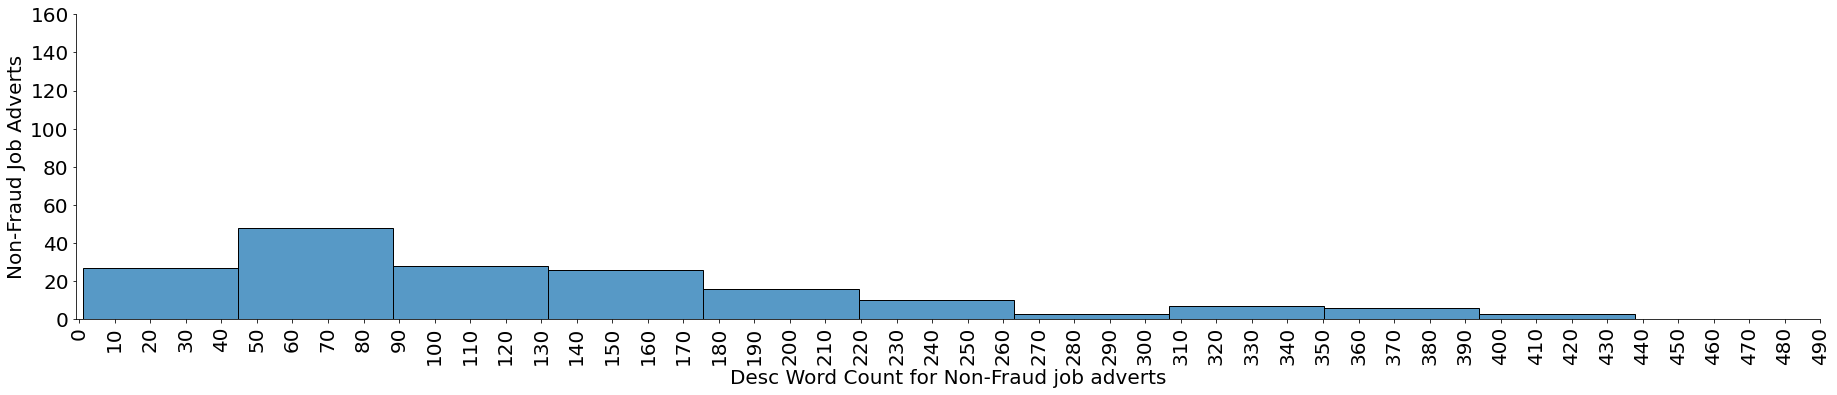

In [22]:
sns.displot(desc_nonfraud['desc_len'], height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Desc Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,500, 10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(desc_nonfraud['desc_len'])),20), fontsize = 20)
plt.show()

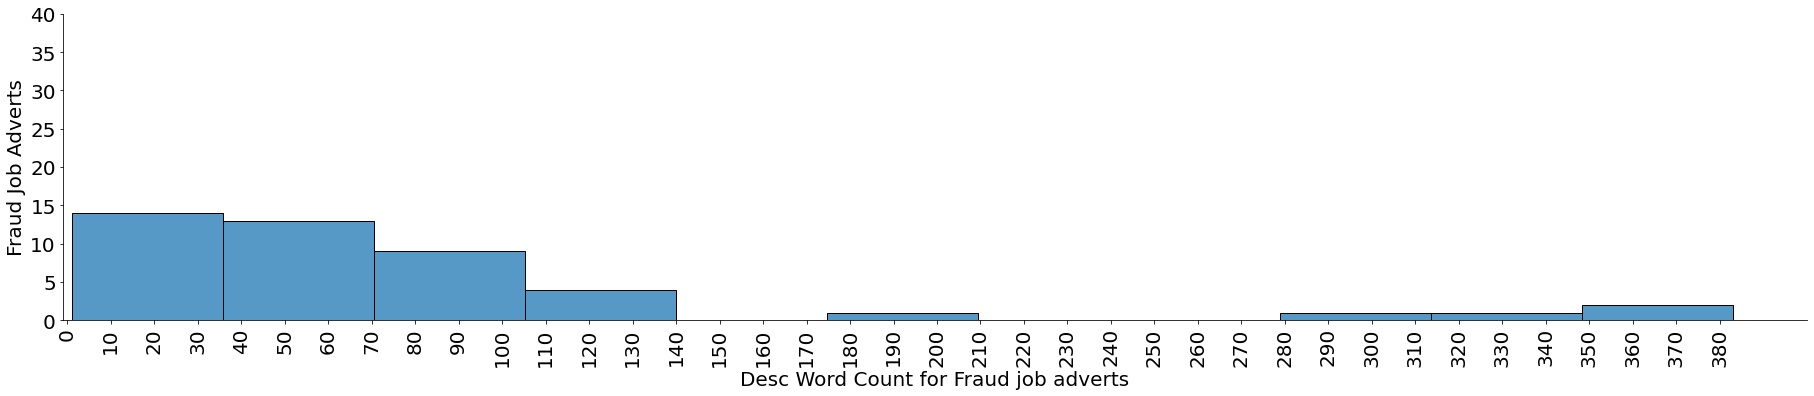

In [23]:
sns.displot(desc_fraud['desc_len'], height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Desc Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,max(list(desc_fraud['desc_len'])), 10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(desc_fraud['desc_len'])), 5), fontsize = 20)
plt.show()

In [24]:
len(jobdf[(jobdf['desc_len']<=90) & (jobdf['fraudulent']==0)])

77

77 out of 175 genuine jobs have desc_len under 90.(44%).
33 out of 45 fraud jobs have desc_len under 90.(73%).

In [25]:
#has short description
def has_short_description(x):
  if x <= 90:
    return 1
  else:
    return 0

#has_short_desc = lambda x: 1 if x<=100 else 0

short_desc_list = jobdf['desc_len'].apply(has_short_description)

In [26]:
jobdf['has_short_desc'] = short_desc_list
print(short_desc_list[0:5], "\n", jobdf.desc_len.head(5))



0    1
1    0
2    1
3    1
4    1
Name: desc_len, dtype: int64 
 0     79
1    177
2     86
3     38
4     58
Name: desc_len, dtype: int64


In [27]:
benefits_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].benefits_len)
benefits_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].benefits_len)

print(type(benefits_nonfraud))

benefits_fraud.reset_index(drop=True,inplace=True)
benefits_nonfraud.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>


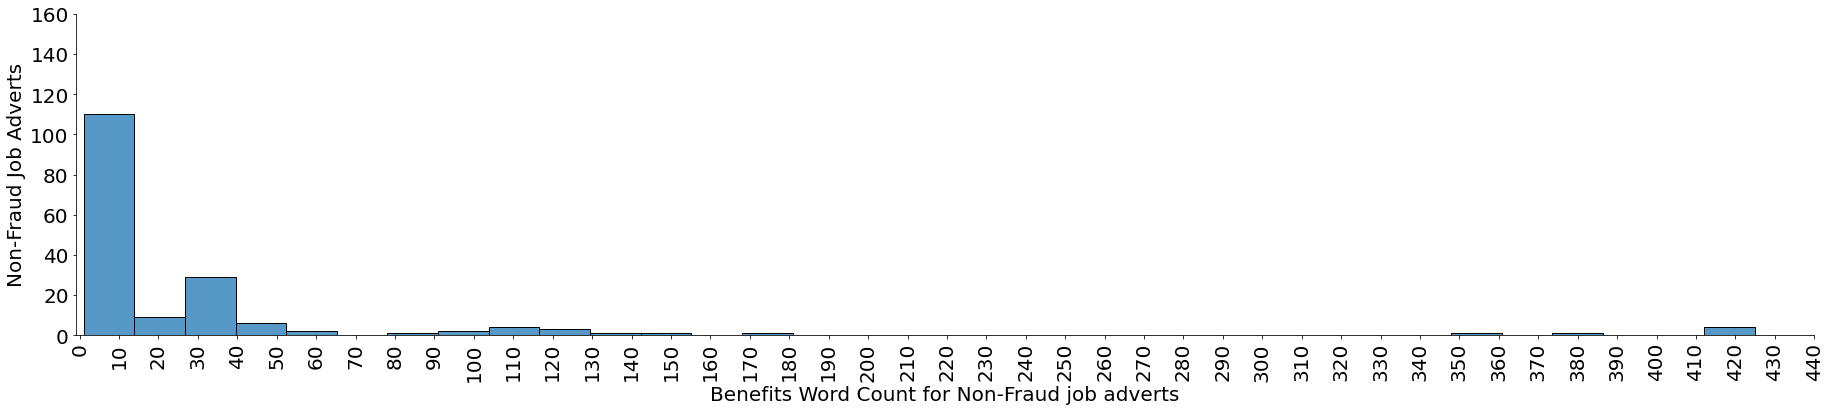

In [28]:
sns.displot(list(benefits_nonfraud['benefits_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Benefits Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,450,10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(benefits_nonfraud['benefits_len'])),20), fontsize = 20)
plt.show()

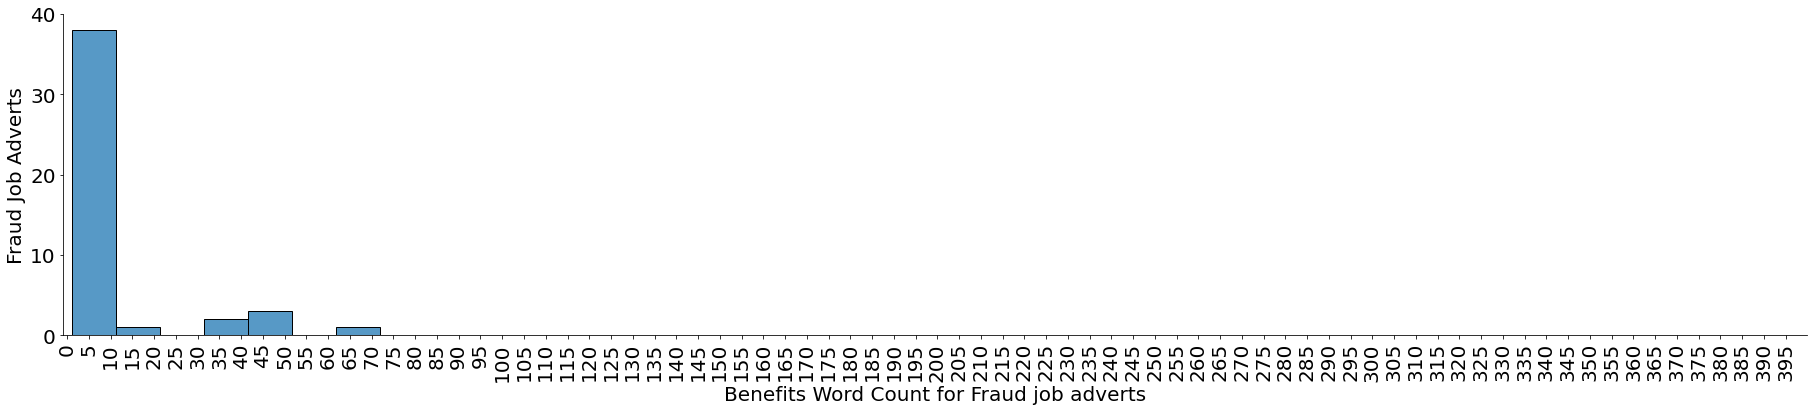

In [29]:
sns.displot(list(benefits_fraud['benefits_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Benefits Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,400,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(benefits_fraud['benefits_len'])),10), fontsize = 20)
plt.show()

In [30]:
len(jobdf[(jobdf['benefits_len']<=10) & (jobdf['fraudulent']==1)])

38

Company profile length

In [31]:
compprof_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].compprof_len)
compprof_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].compprof_len)

print(type(compprof_nonfraud))

compprof_fraud.reset_index(drop=True,inplace=True)
compprof_nonfraud.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>


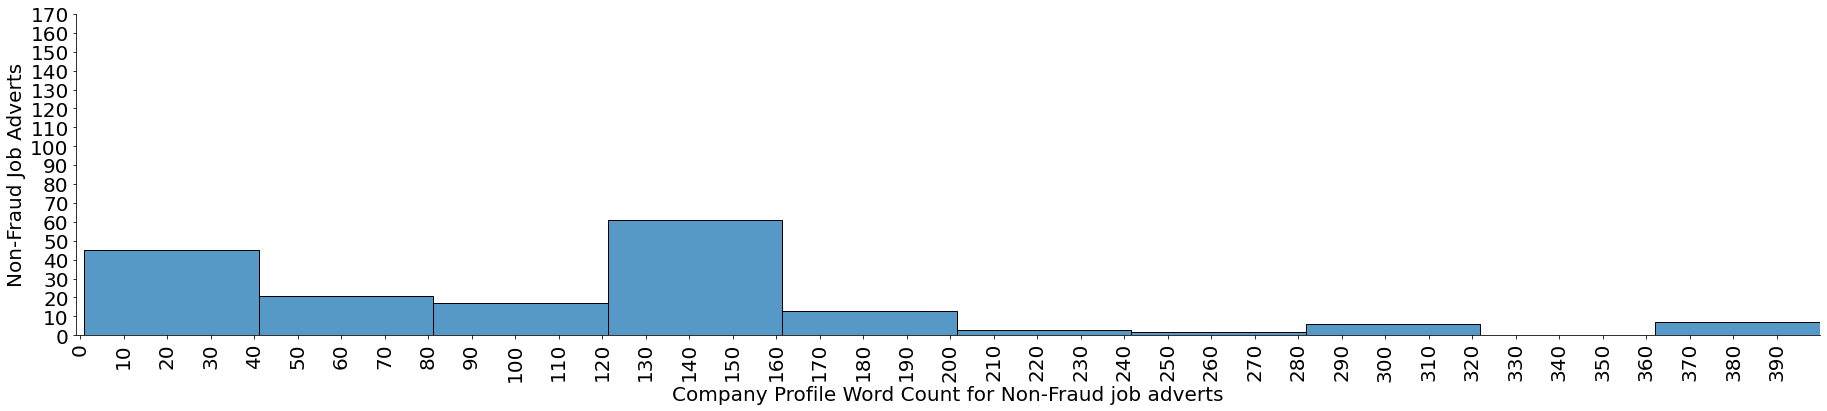

In [32]:
sns.displot(list(compprof_nonfraud['compprof_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Company Profile Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,400,10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(compprof_nonfraud['compprof_len'])),10), fontsize = 20)
plt.show()

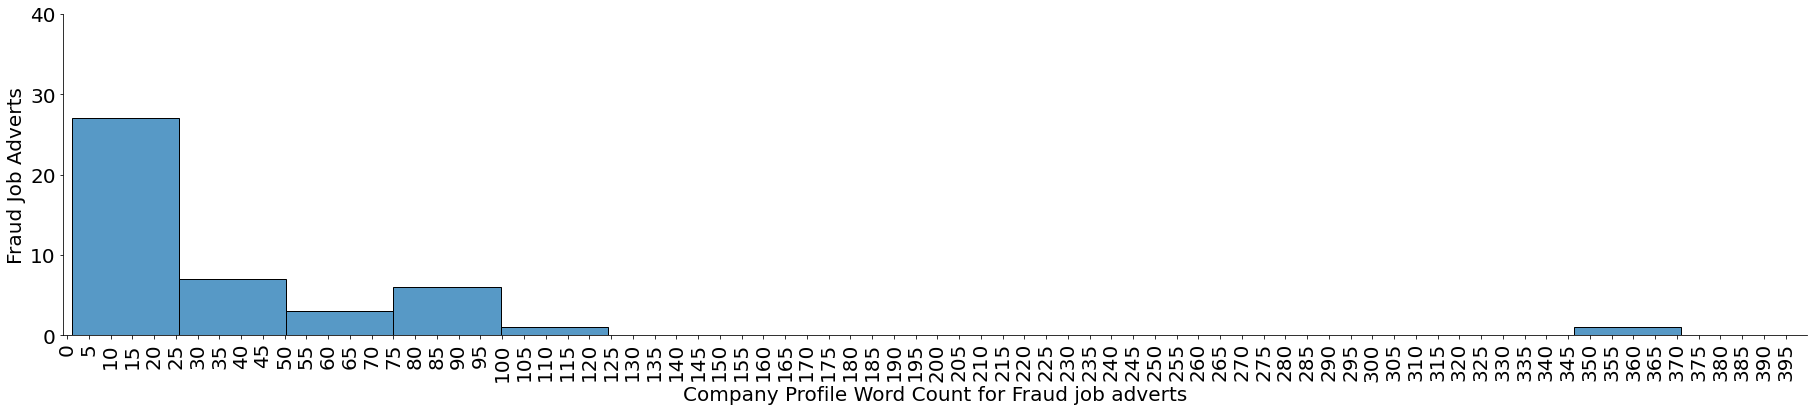

In [33]:
sns.displot(list(compprof_fraud['compprof_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Company Profile Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,400,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(compprof_fraud['compprof_len'])),10), fontsize = 20)
plt.show()

In [34]:
len(jobdf[(jobdf['compprof_len']<=50) & (jobdf['fraudulent']==1)])

34

In [35]:
#has short company profile
def has_short_compprof(x):
  if x <= 50:
    return 1
  else:
    return 0

#has_short_desc = lambda x: 1 if x<=100 else 0

short_compprof_list = jobdf['compprof_len'].apply(has_short_compprof)

In [36]:
jobdf['has_short_compprof'] = short_compprof_list
print(short_compprof_list[0:5], "\n", jobdf.compprof_len.head(5))

0    0
1    1
2    0
3    1
4    1
Name: compprof_len, dtype: int64 
 0    158
1      3
2    281
3      1
4      1
Name: compprof_len, dtype: int64


In [37]:
req_len_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].req_len)
req_len_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].req_len)

print(type(req_len_fraud))

req_len_fraud.reset_index(drop=True,inplace=True)
req_len_nonfraud.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>


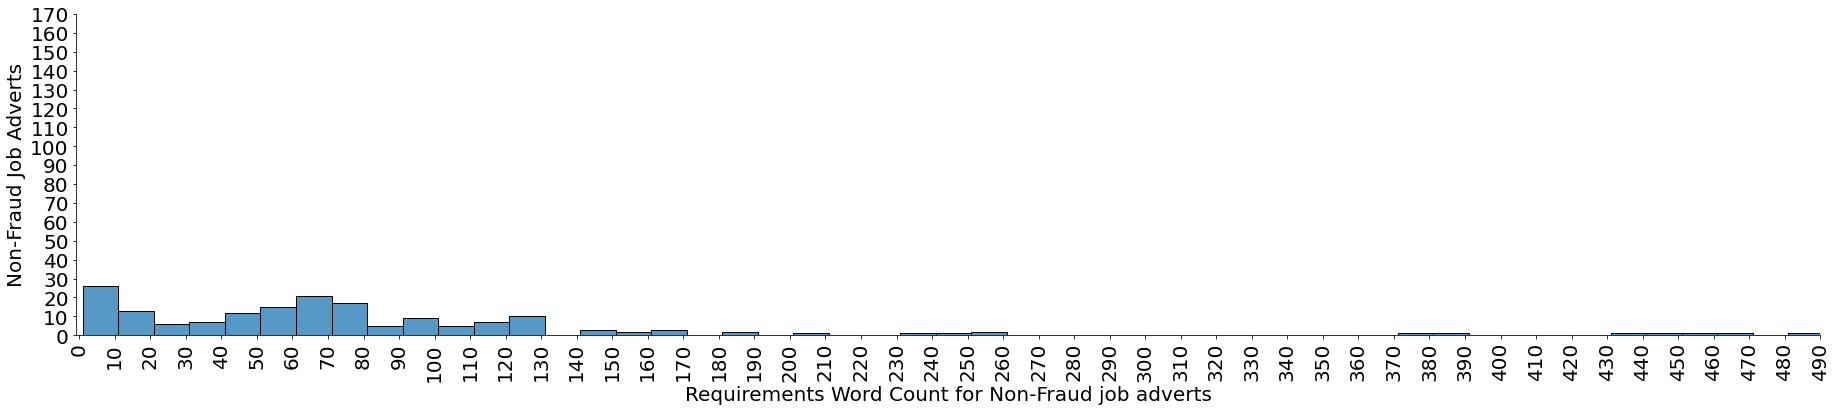

In [38]:
sns.displot(list(req_len_nonfraud['req_len']), height = 5, aspect = 5, binwidth = 10)
plt.xlim([-1,400])
plt.xlabel('Requirements Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,500,10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(req_len_nonfraud['req_len'])),10), fontsize = 20)
plt.show()

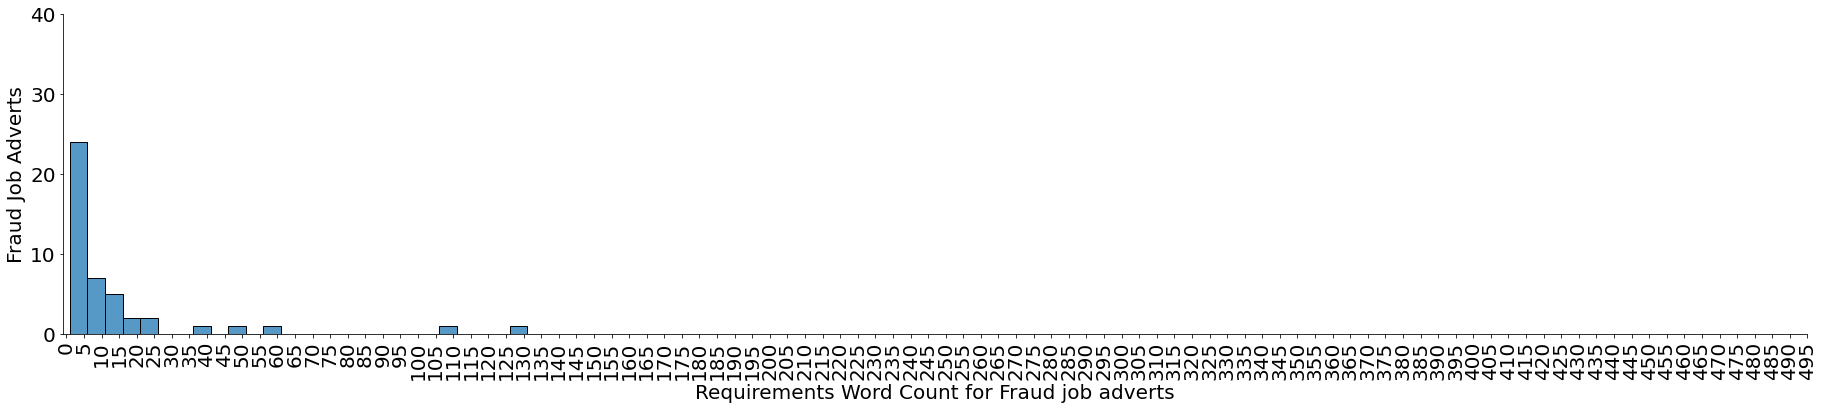

In [39]:
sns.displot(list(req_len_fraud['req_len']), height = 5, aspect = 5, binwidth = 5)
plt.xlim([-1,400])
plt.xlabel('Requirements Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,500,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(req_len_fraud['req_len'])), 10), fontsize = 20)
plt.show()

In [40]:
len(jobdf[(jobdf['req_len']<=7) & (jobdf['fraudulent']==0)])

23

28 out of 45 Fraud jobs have less than 7 requirements word count(62%).
23 out 175 Non-Fraud jobs have less than 7 requirements word count(13%).

In [41]:
#has short requirements
def has_short_req(x):
  if x <= 7:
    return 1
  else:
    return 0

#has_short_desc = lambda x: 1 if x<=100 else 0

short_req_list = jobdf['req_len'].apply(has_short_req)

In [42]:
jobdf['has_short_req'] = short_req_list
print(short_req_list[0:5], "\n", jobdf.req_len.head(5))

0    1
1    1
2    0
3    0
4    1
Name: req_len, dtype: int64 
 0     2
1     2
2    50
3    36
4     1
Name: req_len, dtype: int64


Replacing NaN values to Empty

In [43]:
jobdf['employment_type'].fillna('Empty',inplace=True)
jobdf['required_experience'].fillna('Empty',inplace=True)
jobdf['required_education'].fillna('Empty',inplace=True)
jobdf['industry'].fillna('Empty',inplace=True)
jobdf['function'].fillna('Empty',inplace=True)



In [44]:
jobdf.head()

,title,location,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_education,required_experience,industry,function,fraudulent,compprof_len,desc_len,req_len,benefits_len,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof,has_short_req
0,QA Engineer,Bengaluru / Bangalore,NaN,Quess IT Staffing. Founded in 1997 as an entre...,End to End Functional testing of virtual educa...,Api Testing,Empty,0,1,1,Full time,Masters,Mid-Senior level,"IT/Computers - Hardware & Networking , IT/Comp...",IT,0,158,79,2,1,0,0,0,1,1,0,1
1,PMO,Bengaluru / Bangalore,NaN,Templeton and Partners,Understand the Project Delivery Framework (PDF...,Project Finance,Empty,0,0,1,Part time,Masters,Mid-Senior level,IT / Computers - Software,Empty,0,3,177,2,1,0,0,0,1,0,1,1
2,Chat Support,Chandigarh,240000-280000,Tech Mahindra is part of the US $15.4 billion ...,Process:- English process (Chat Process)\nNote...,Eligibility Criteria:-\nMandatory: Excellent c...,Empty,0,1,1,Full time,Bachelors,Associate,ITES/BPO,Customer Service/Call Centre/BPO,0,281,86,50,1,0,0,0,1,1,0,0
3,Angular Engineer,Remote,NaN,theuniversal.in,Responsibilities :1. Work closely with the tea...,Technical skills required :1. Angular 10 and a...,Empty,1,0,0,Full time,Bachelors,Associate,IT/Computers - Software,IT,1,1,38,36,1,0,0,0,1,1,1,0
4,Work From Home -Technical Support- Work From H...,Remote,220000-409999,Empty,Job Description:Voice support to the customer....,Empty,Empty,1,0,0,Part time,Bachelors,Associate,Telecom,Customer Service/Call Centre/BPO,1,1,58,1,1,1,0,1,1,1,1,1


Create new feature has_special_attributes

In [45]:
special_attr_list = []

for i in range(len(jobdf['required_education'])):
  a = jobdf['required_education'][i]
  b = jobdf['required_experience'][i]
  c = jobdf['function'][i]

  if a == 'Empty' and b == 'Empty' and c == 'Empty':
    special_attr_list.append(1)
  else:
    special_attr_list.append(0)
  


In [46]:
jobdf['has_spec_attr'] = special_attr_list

In [47]:
jobdf.head()

,title,location,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_education,required_experience,industry,function,fraudulent,compprof_len,desc_len,req_len,benefits_len,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof,has_short_req,has_spec_attr
0,QA Engineer,Bengaluru / Bangalore,NaN,Quess IT Staffing. Founded in 1997 as an entre...,End to End Functional testing of virtual educa...,Api Testing,Empty,0,1,1,Full time,Masters,Mid-Senior level,"IT/Computers - Hardware & Networking , IT/Comp...",IT,0,158,79,2,1,0,0,0,1,1,0,1,0
1,PMO,Bengaluru / Bangalore,NaN,Templeton and Partners,Understand the Project Delivery Framework (PDF...,Project Finance,Empty,0,0,1,Part time,Masters,Mid-Senior level,IT / Computers - Software,Empty,0,3,177,2,1,0,0,0,1,0,1,1,0
2,Chat Support,Chandigarh,240000-280000,Tech Mahindra is part of the US $15.4 billion ...,Process:- English process (Chat Process)\nNote...,Eligibility Criteria:-\nMandatory: Excellent c...,Empty,0,1,1,Full time,Bachelors,Associate,ITES/BPO,Customer Service/Call Centre/BPO,0,281,86,50,1,0,0,0,1,1,0,0,0
3,Angular Engineer,Remote,NaN,theuniversal.in,Responsibilities :1. Work closely with the tea...,Technical skills required :1. Angular 10 and a...,Empty,1,0,0,Full time,Bachelors,Associate,IT/Computers - Software,IT,1,1,38,36,1,0,0,0,1,1,1,0,0
4,Work From Home -Technical Support- Work From H...,Remote,220000-409999,Empty,Job Description:Voice support to the customer....,Empty,Empty,1,0,0,Part time,Bachelors,Associate,Telecom,Customer Service/Call Centre/BPO,1,1,58,1,1,1,0,1,1,1,1,1,0


Correcting employment type categories.

In [48]:
jobdf['employment_type'].unique()

array(['Full time', 'Part time', 'Full Time', 'Part Time', 'Full-time',
       'Empty', 'Contract', 'Part-time', 'Other', 'Temporary'],
      dtype=object)

In [49]:
jobdf['employment_type'].replace(['Full Time', 'Full-time', 'Full Time', 'Full time'], 'Full Time', inplace=True)
jobdf['employment_type'].replace(['Part-time', 'Part time', 'Part Time'], 'Part Time', inplace=True)

In [50]:
jobdf['employment_type'].unique()

array(['Full Time', 'Part Time', 'Empty', 'Contract', 'Other',
       'Temporary'], dtype=object)

Correcting required_education categories.

In [51]:
jobdf['required_education'].unique()

array(['Masters', 'Bachelors', 'Bachelors\xa0', 'Not specified', 'SSC',
       'HSC', 'Bachelors/ Masters', 'Bachelors/Masters',
       'HSC/Bachelors/Masters', 'HSC/Bachelors', 'Civil Engineer',
       'Electrical Engineer', 'MBA', 'Empty', 'Diploma',
       "Bachelor's Degree", "Master's Degree", 'Unspecified',
       'Certification', 'Professional'], dtype=object)

In [108]:
jobdf['required_education'].replace(['Bachelors', 'Bachelors\xa0', 'Bachelor\'s Degree'], 'Bachelor\'s Degree', inplace=True)
jobdf['required_education'].replace(['Master\'s Degree', 'Masters'], 'Master\'s Degree', inplace=True)
jobdf['required_education'].replace(['Civil Engineer', 'Electrical Engineer'], 'Engineer', inplace=True)
jobdf['required_education'].replace(['Not specified', 'Unspecified'], 'Empty', inplace=True)
jobdf['required_education'].replace(['Bachelors/ Masters'], 'Bachelors/Masters', inplace=True)

In [109]:
jobdf['required_education'].unique()

array(["Master's Degree", "Bachelor's Degree", 'Empty', 'SSC', 'HSC',
       'Bachelors/Masters', 'HSC/Bachelors/Masters', 'HSC/Bachelors',
       'Engineer', 'MBA', 'Diploma', 'Certification', 'Professional'],
      dtype=object)

In [54]:
jobdf['required_experience'].unique()

array(['Mid-Senior level', 'Associate', 'Senior level', 'Fresher',
       'Entry level', 'Empty', 'Not Applicable', 'Internship', 'Director',
       'Executive'], dtype=object)

In [106]:
jobdf['required_experience'].replace(['Not Applicable'], 'Empty', inplace=True)

In [55]:
#jobdf['function'].unique()

Average of Length of Textual columns for Fraud and NonFraud job adverts

In [161]:
from numpy.lib.function_base import average
print("Average Company profile word count for Fraud Jobs: ",average(compprof_fraud))
print("Average Company profile word count for Genuine Jobs: ", average(compprof_nonfraud))
print("\n")
print("Average Description word count for Fraud Jobs: ", average(desc_fraud))
print("Average Description word count for Genuine Jobs: ", average(desc_nonfraud))
print("\n")
print("Average Requirements word count for Fraud Jobs: ", average(req_len_fraud))
print("Average Requirements word count for Genuine Jobs: ", average(req_len_nonfraud)) 



Average Company profile word count for Fraud Jobs:  34.91111111111111
Average Company profile word count for Genuine Jobs:  116.86285714285714


Average Description word count for Fraud Jobs:  82.24444444444444
Average Description word count for Genuine Jobs:  136.49714285714285


Average Requirements word count for Fraud Jobs:  13.977777777777778
Average Requirements word count for Genuine Jobs:  82.59428571428572


#Machine Learning models implementation

In [57]:
detectdf = jobdf.copy()

In [58]:
detectdf.drop(['title','location','salary_range','company_profile','description','requirements','benefits','compprof_len','desc_len','benefits_len','req_len'],axis=1,inplace=True)

In [59]:
# detectdf.drop(['job_id'],axis=1,inplace=True)

In [60]:
detectdf = detectdf[['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','empty_compprof','empty_desc','empty_req','empty_benefits','has_short_desc','has_short_compprof', 'has_short_req', 'has_spec_attr','fraudulent']]

In [61]:
detectdf = pd.get_dummies(detectdf, columns = ['employment_type','required_education','required_experience','industry','function'])
detectdf.head()

,telecommuting,has_company_logo,has_questions,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof,has_short_req,has_spec_attr,fraudulent,employment_type_Contract,employment_type_Empty,employment_type_Full Time,employment_type_Other,employment_type_Part Time,employment_type_Temporary,required_education_Bachelor's Degree,required_education_Bachelors/Masters,required_education_Certification,required_education_Diploma,required_education_Empty,required_education_Engineer,required_education_HSC,required_education_HSC/Bachelors,required_education_HSC/Bachelors/Masters,required_education_MBA,required_education_Master's Degree,required_education_Professional,required_education_SSC,required_education_Unspecified,required_experience_Associate,required_experience_Director,required_experience_Empty,required_experience_Entry level,required_experience_Executive,required_experience_Fresher,required_experience_Internship,required_experience_Mid-Senior level,required_experience_Not Applicable,required_experience_Senior level,industry_\nBio Technology & Life Sciences,industry_Airlines / Aviation / Aerospace,industry_Airlines/Aviation/Aerospace,industry_Animation,industry_Aviation / Airline,industry_Banking / Accounting / Financial Services,industry_Banking/Accounting/Financial Services,industry_Computer Networking,industry_Computer Software,industry_Construction & Engineering,industry_Consulting / Advisory Services,industry_Education / Training,industry_Education Management,industry_Empty,industry_Engineering & Design,industry_Engineering / Construction,industry_Entertainment / Media / Publishing,industry_Entertainment/Media/Publishing,industry_Graphic Design,industry_Hospital & Health Care,industry_Hospitals/Healthcare/Diagnostics,industry_IT,industry_IT - Hardware / Networking,industry_IT - Hardware / Networking,industry_IT - Software,industry_IT - Software,industry_IT / Computers - Software,"industry_IT/Computers - Hardware & Networking , IT/Computers - Software",industry_IT/Computers - Software,industry_IT/Computers - Software,industry_IT/Computers - Software,industry_ITES/BPO,industry_ITES/BPO,industry_IT / Computers - Software,industry_Information Services,industry_Information Technology and Services,industry_Internet,industry_Internet / E-commerce,industry_Internet/E-commerce,industry_Internet/E-commerce,industry_Luxury Goods & Jewelry,industry_Manufacturing,industry_Market Research,industry_Nonprofit Organization Management,industry_Oil & Gas / Petroleum,industry_Other,industry_Other,industry_Outsourcing/Offshoring,industry_Pharmaceuticals,industry_Recruitment/Staffing/RPO,industry_Retail,industry_Software Development,industry_T / Computers - Software,industry_Telecom,industry_Wellness/Fitness/Sports,industry_Writing and Editing,industry_ IT/Computers - Software,function_Accounting/Auditing,function_Admin / Secretarial / Front Office,function_Administrative,function_Airport / Airline Ground OperationsService / Installation / Repair,function_Art/Creative,function_Banking,function_Consulting,function_Customer Service (Domestic),function_Customer Service/Call Centre/BPO,function_Customer Service/Call Centre/BPO,function_Design,function_Development,function_Digital Marketing,function_Education,function_Education / Teaching,function_Empty,function_Engineering,function_Engineering - Electrical,function_Engineering - Mechanical,function_Engineering Design / Construction,function_Engineering Design / Construction Oil & Gas Engineering,function_Finance & Accounts,function_General / Other Software,function_General / Other Software Network / System Administration,function_Health Care,function_Health Care,function_Health Care Provider,function_Human Resources,function_Human Resources,function_IT,function_IT,function_IT - Software,"function_IT- Hardware/Telecom/Technical Staff/Support , IT/Software Development - Network Administration/Security",function_Information Technology,function_Journalism / Content Writing / Ed

Importing necessary libraries.


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC  

In [63]:
jdf = detectdf.drop(['fraudulent'],axis=1)
y = detectdf['fraudulent']

In [64]:
print(jdf.shape)
print(y.shape)

(220, 152)
(220,)


Splitting the dataset into train test set


In [65]:
X_train, X_test, y_train, y_test = train_test_split(jdf, y,test_size = 0.3, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (154, 152)
Testing split input-  (66, 152)


In [66]:
print(X_train.shape)
print(y_train.shape)

(154, 152)
(154,)


In [67]:
actual = y_test

Logistic Regression

In [68]:
log_model = LogisticRegression(solver='lbfgs', max_iter=400).fit(X_train, y_train)

In [69]:
predicted_logreg = log_model.predict(X_test)
p = pd.DataFrame(predicted_logreg)
actual = y_test

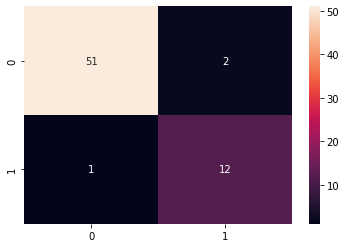

In [70]:
cf_matrix = sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix, annot = True, fmt='g')

In [71]:
print("Classification report - \n", classification_report(y_test,predicted_logreg))

Classification report - 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.86      0.92      0.89        13

    accuracy                           0.95        66
   macro avg       0.92      0.94      0.93        66
weighted avg       0.96      0.95      0.96        66



In [72]:
logreg_acc = sm.accuracy_score(y_test, predicted_logreg)*100
logreg_prec = sm.precision_score(y_test, predicted_logreg)*100
logreg_recall = sm.recall_score(y_test, predicted_logreg)*100

DECISION TREE

In [73]:
dtree=DecisionTreeClassifier(random_state=42)
p = dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [74]:
y_pred_dtree = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred_dtree))

Classification report - 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.92      0.85      0.88        13

    accuracy                           0.95        66
   macro avg       0.94      0.91      0.93        66
weighted avg       0.95      0.95      0.95        66



In [75]:
sm.accuracy_score(y_test, y_pred_dtree)*100

95.45454545454545

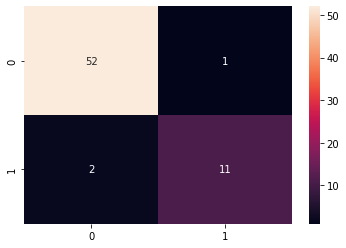

In [76]:
pred = pd.DataFrame(y_pred_dtree)
cf_matrix = sm.confusion_matrix(y_test,pred)
sns.heatmap(cf_matrix, annot = True, fmt='g')

In [77]:
dtree_acc = sm.accuracy_score(y_test, y_pred_dtree)*100
dtree_prec = sm.precision_score(y_test, y_pred_dtree)*100
dtree_recall = sm.recall_score(y_test, y_pred_dtree)*100

RANDOM FOREST

In [90]:
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 1, min_samples_split = 2) 
clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", sm.accuracy_score(y_test, y_pred_rf))

ACCURACY OF THE MODEL:  0.9696969696969697


In [91]:
print("Classification report - \n", classification_report(y_test,y_pred_rf))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.87      1.00      0.93        13

    accuracy                           0.97        66
   macro avg       0.93      0.98      0.95        66
weighted avg       0.97      0.97      0.97        66



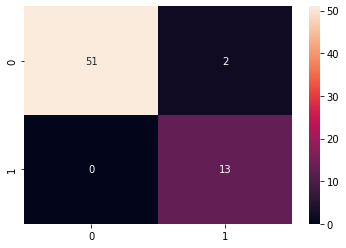

In [92]:
p = pd.DataFrame(y_pred_rf)
cf_matrix = sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix, annot = True, fmt='g')

In [93]:
rf_acc = sm.accuracy_score(y_test, y_pred_rf)*100
rf_prec = sm.precision_score(y_test, y_pred_rf)*100
rf_recall = sm.recall_score(y_test, y_pred_rf)*100

SVM

In [82]:
clf = SVC(kernel='rbf', C = 10, gamma = 0.1) 
clf.fit(X_train, y_train)

y_pred_svm = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", sm.accuracy_score(y_test, y_pred_svm))

ACCURACY OF THE MODEL:  0.9848484848484849


In [83]:
svm_acc = sm.accuracy_score(y_test, y_pred_svm)*100

In [84]:
print("Classification report - \n", classification_report(y_test,y_pred_svm))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.93      1.00      0.96        13

    accuracy                           0.98        66
   macro avg       0.96      0.99      0.98        66
weighted avg       0.99      0.98      0.99        66



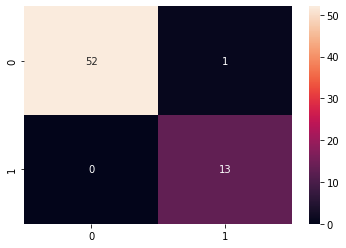

In [85]:
p = pd.DataFrame(y_pred_svm)
cf_matrix = sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix, annot = True, fmt='g')

In [86]:
svm_acc = sm.accuracy_score(y_test, y_pred_svm)*100
svm_prec = sm.precision_score(y_test, y_pred_svm)*100
svm_recall = sm.recall_score(y_test, y_pred_svm)*100

Plotting Accuracy, Precision and Recall of Decision Tree, Random Forest and SVM.

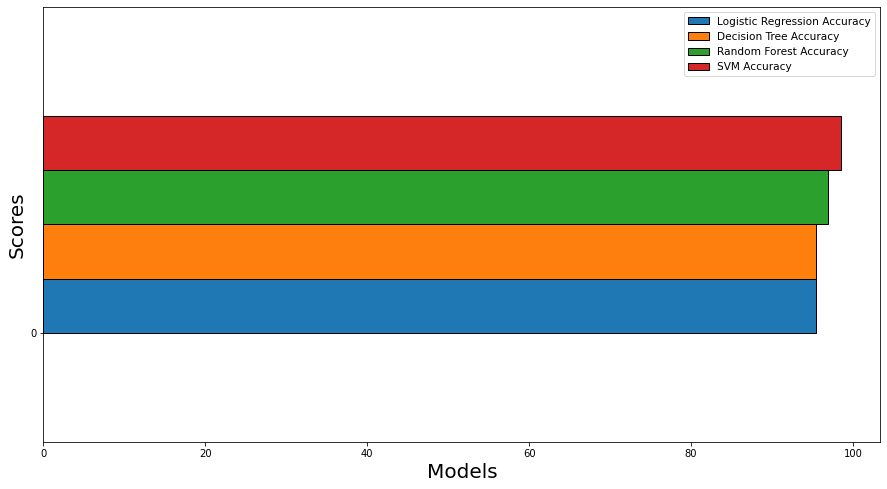

In [95]:
modelacc = pd.DataFrame({"Logistic Regression Accuracy": [logreg_acc],
                          "Decision Tree Accuracy": [dtree_acc],
                          "Random Forest Accuracy": [rf_acc],
                          "SVM Accuracy": [svm_acc]})
modelacc.plot.barh(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=10.5);

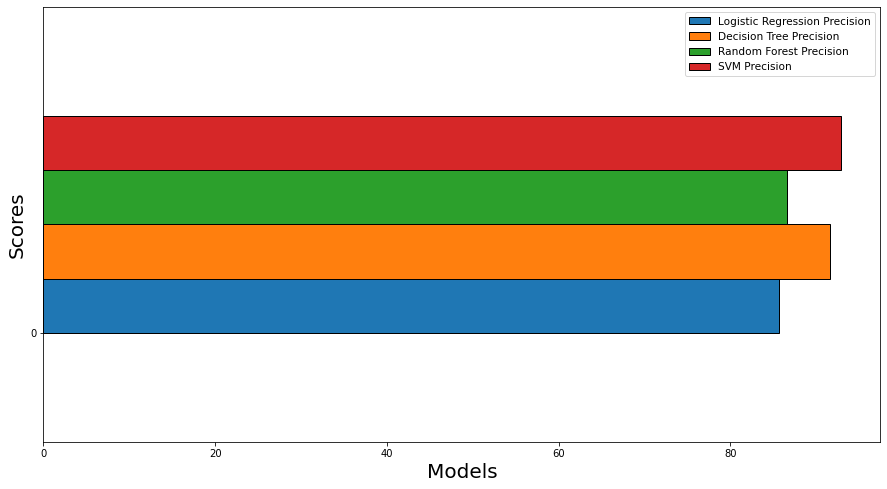

In [96]:
modelprec = pd.DataFrame({"Logistic Regression Precision": [logreg_prec],
                          "Decision Tree Precision": [dtree_prec],
                          "Random Forest Precision": [rf_prec],
                          "SVM Precision": [svm_prec]})
modelprec.plot.barh(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=10.5);

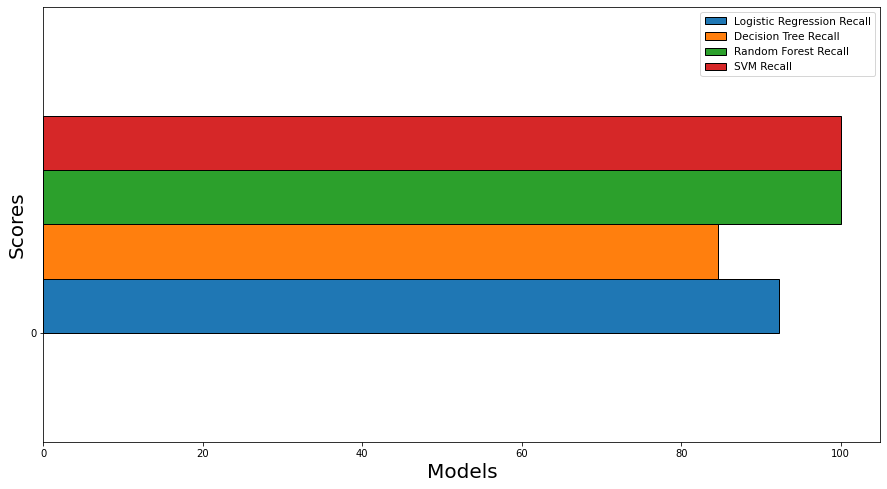

In [94]:
modelrecall = pd.DataFrame({"Logistic Regression Recall": [logreg_recall],
                          "Decision Tree Recall ": [dtree_recall],
                               "Random Forest Recall": [rf_recall],
                          "SVM Recall": [svm_recall]})
modelrecall.plot.barh(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=10.5);

#Exploratory Data Analysis

Most desired required education in job adverts.(Without considering NA values.

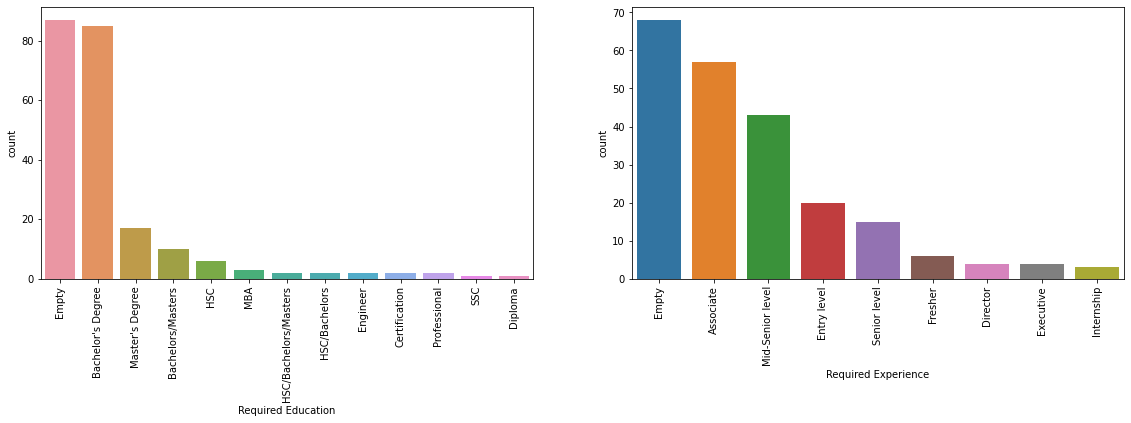

In [110]:
plt.figure(figsize=(30,5))
fig1 = plt.subplot(1,3,1)
ax1 = sns.countplot(x=jobdf['required_education'].astype(str), data=jobdf['required_education'], order = jobdf['required_education'].value_counts().index)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Required Education')


fig2 = plt.subplot(1,3,2)
ax2 = sns.countplot(x=jobdf['required_experience'].astype(str),  data=jobdf['required_experience'], order = jobdf['required_experience'].value_counts().index)
plt.setp(ax2.get_xticklabels(), rotation = 90)
plt.xlabel('Required Experience')

plt.show()

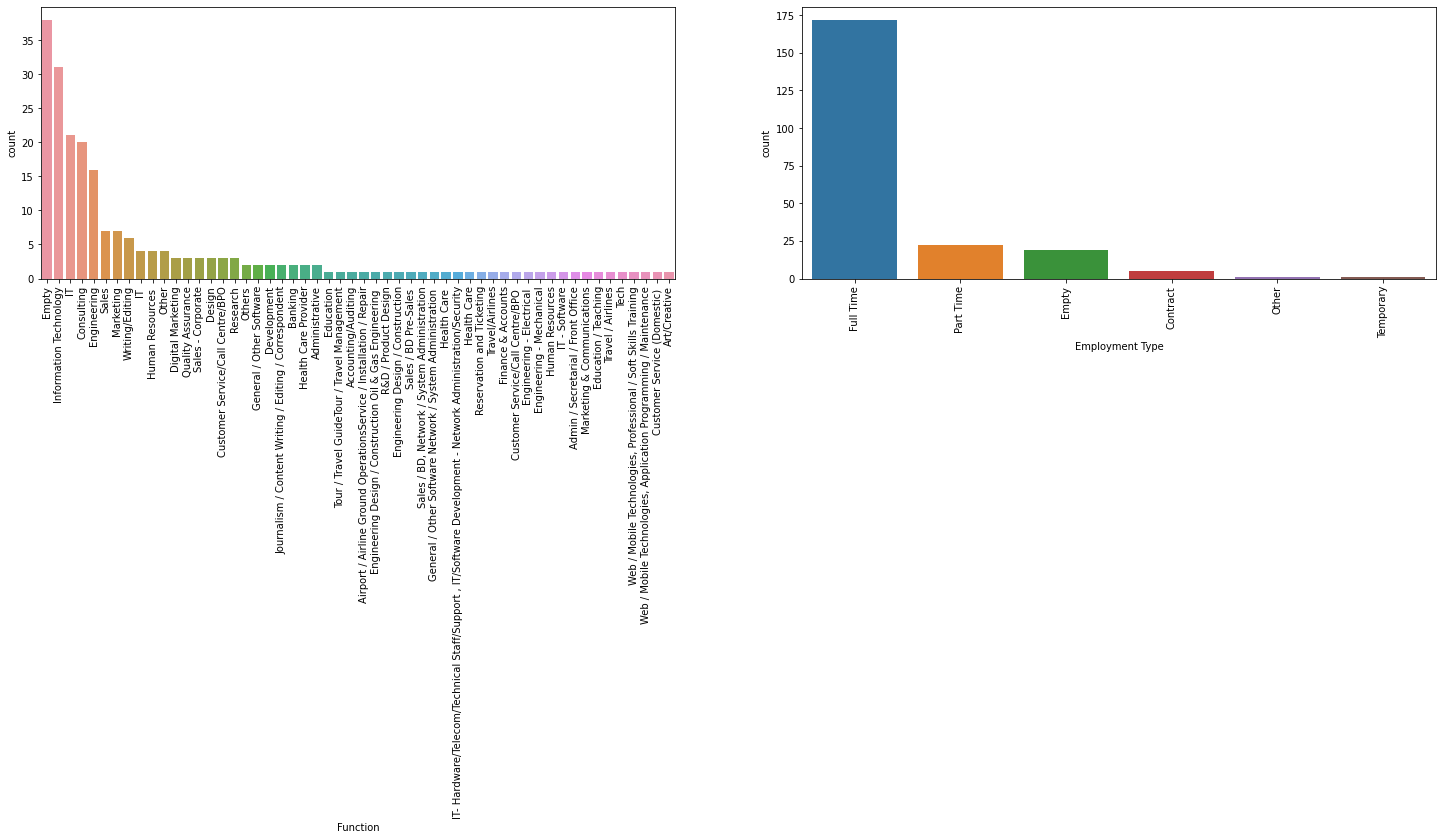

In [112]:
plt.figure(figsize=(25,5))
fig1 = plt.subplot(1,2,1)
ax=sns.countplot(x=jobdf['function'].astype(str), data=jobdf['function'], order = jobdf['function'].value_counts().index)
#plt.xticks(rotation='vertical')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel('Function')

fig3 = plt.subplot(1,2,2)
ax3 = sns.countplot(x=jobdf['employment_type'].astype(str), data=jobdf['employment_type'], order = jobdf['employment_type'].value_counts().index)
plt.setp(ax3.get_xticklabels(), rotation = 90)
plt.xlabel('Employment Type')

plt.show()

Plotting above graphs for NonFraud V Fraud.

In [113]:
fraudjob = pd.DataFrame(jobdf[jobdf['fraudulent']==1])
genuinejob = pd.DataFrame(jobdf[jobdf['fraudulent']==0])

In [114]:
genuinejob.shape

(175, 28)

Text(0.5, 0, 'Required Education for Fraud Jobs')

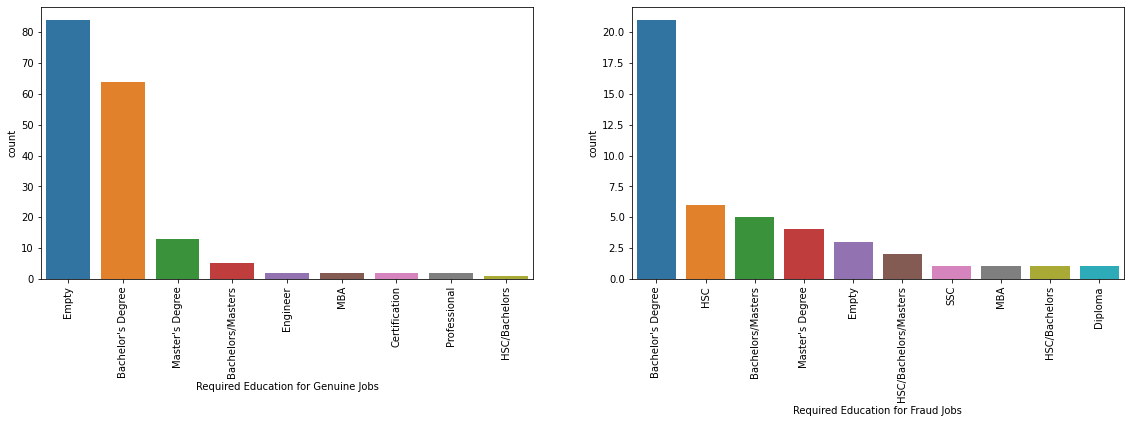

In [116]:
plt.figure(figsize=(30,5))
fig1 = plt.subplot(1,3,1)
ax1 = sns.countplot(x=genuinejob['required_education'].astype(str), data=genuinejob['required_education'], order = genuinejob['required_education'].value_counts().index)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Required Education for Genuine Jobs')

fig2 = plt.subplot(1,3,2)
ax2 = sns.countplot(x=fraudjob['required_education'].astype(str), data=fraudjob, order = fraudjob['required_education'].value_counts().index)
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.xlabel('Required Education for Fraud Jobs')

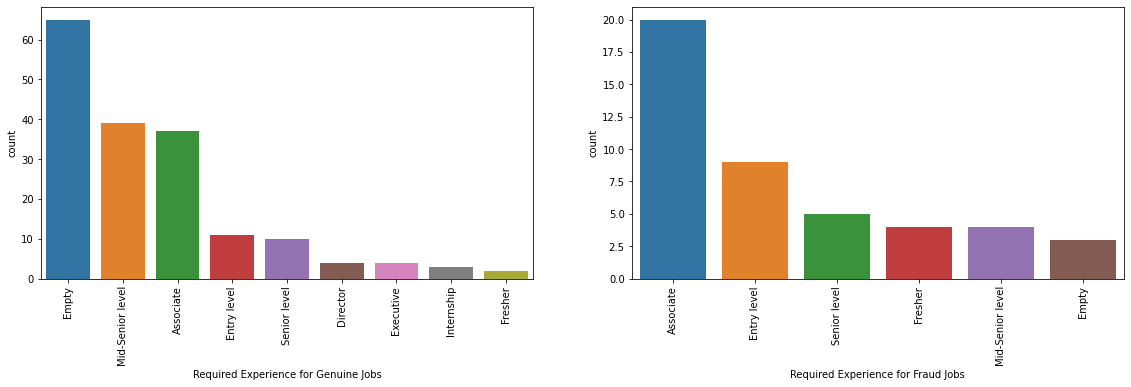

In [117]:

plt.figure(figsize=(30,5))
fig1 = plt.subplot(1,3,1)
ax1 = sns.countplot(x=genuinejob['required_experience'].astype(str),  data=genuinejob['required_experience'], order = genuinejob['required_experience'].value_counts().index)
plt.setp(ax1.get_xticklabels(), rotation = 90)
plt.xlabel('Required Experience for Genuine Jobs')

fig2 = plt.subplot(1,3,2)
ax2 = sns.countplot(x=fraudjob['required_experience'].astype(str),  data=fraudjob['required_experience'], order = fraudjob['required_experience'].value_counts().index)
plt.setp(ax2.get_xticklabels(), rotation = 90)
plt.xlabel('Required Experience for Fraud Jobs')

plt.show()


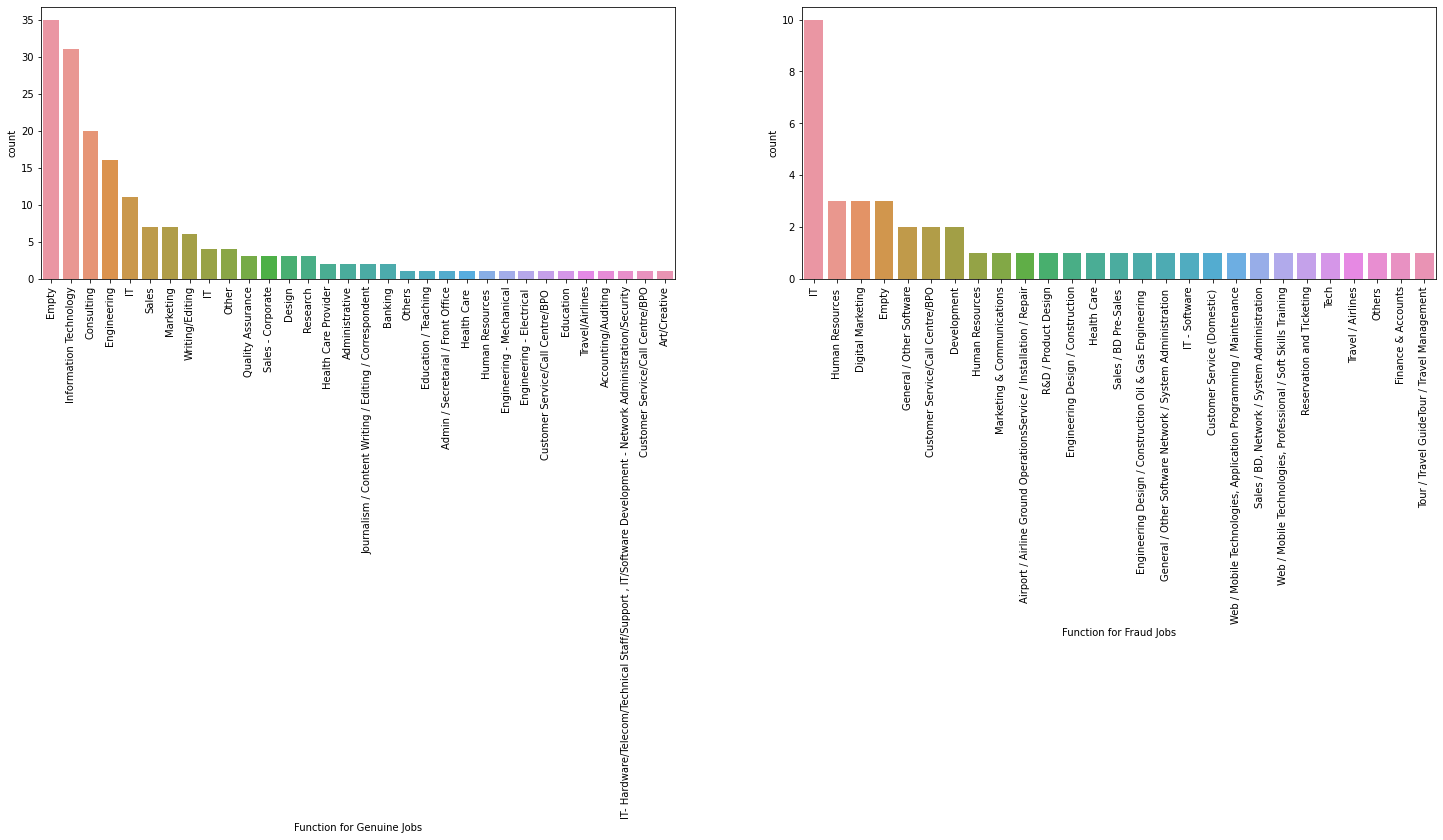

In [118]:
plt.figure(figsize=(25,5))
fig1 = plt.subplot(1,2,1)
ax=sns.countplot(x=genuinejob['function'].astype(str), data=genuinejob['function'], order = genuinejob['function'].value_counts().index)
#plt.xticks(rotation='vertical')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel('Function for Genuine Jobs')

fig1 = plt.subplot(1,2,2)
ax2=sns.countplot(x=fraudjob['function'].astype(str), data=fraudjob['function'], order = fraudjob['function'].value_counts().index)
#plt.xticks(rotation='vertical')
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.xlabel('Function for Fraud Jobs')




plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0.5, 0, 'Employment Type for Fraud Jobs')

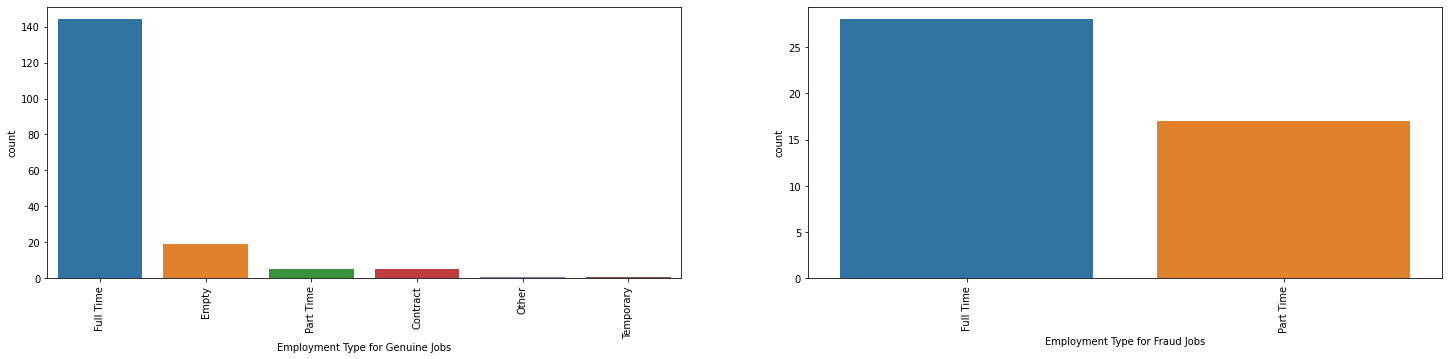

In [119]:
plt.figure(figsize=(25,5))

fig = plt.subplot(1,2,1)
ax = sns.countplot(x=genuinejob['employment_type'].astype(str), data=genuinejob[jobdf['fraudulent']==1], order = genuinejob['employment_type'].value_counts().index)
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.xlabel('Employment Type for Genuine Jobs')


fig3 = plt.subplot(1,2,2)
ax3 = sns.countplot(x=fraudjob['employment_type'].astype(str), data=fraudjob, order = fraudjob['employment_type'].value_counts().index)
plt.setp(ax3.get_xticklabels(), rotation = 90)
plt.xlabel('Employment Type for Fraud Jobs')

#Job Description word count plotted for fraud jobs and non-fraud jobs

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 7 Text major ticklabel objects>)

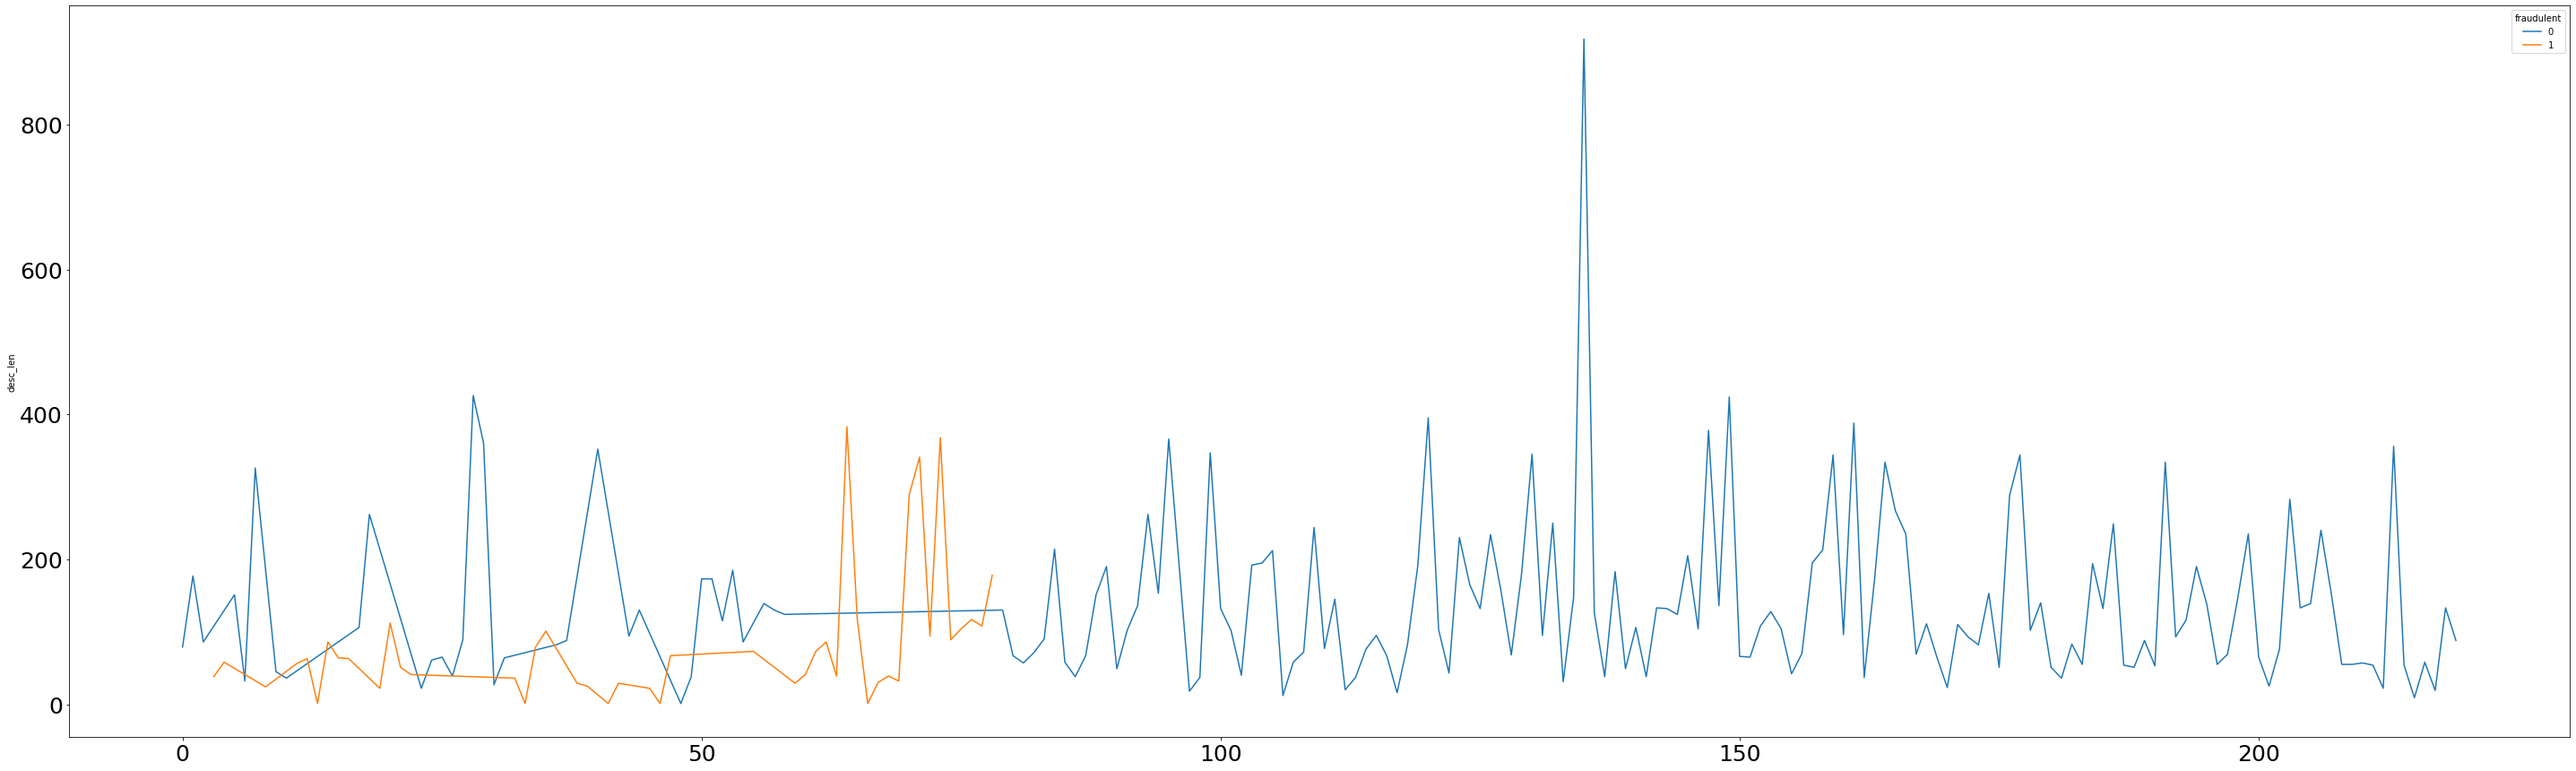

In [120]:
from numpy.ma.core import size
plt.figure(figsize = (50,15))
sns.lineplot(x=jobdf.index, y=jobdf['desc_len'], hue=jobdf['fraudulent'], data = jobdf)
plt.xticks(size=25)
plt.yticks(size=25)